# Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lazy_pipeline as lpipe
%matplotlib inline

In [2]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
print(df.shape)
df.head(10)

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


# Prepare the data

First we need to examine the data in the table, find out what values are in the column and choose how we will binarize the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.columns = ['age', 'anae', 'cp', 'diabet', 'ef','hbp', 'plat', 'sc ', 'ss', 'sex', 'smokig', 'time', 'deathevent']
df.head()

,age,anae,cp,diabet,ef,hbp,plat,sc,ss,sex,smokig,time,deathevent
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


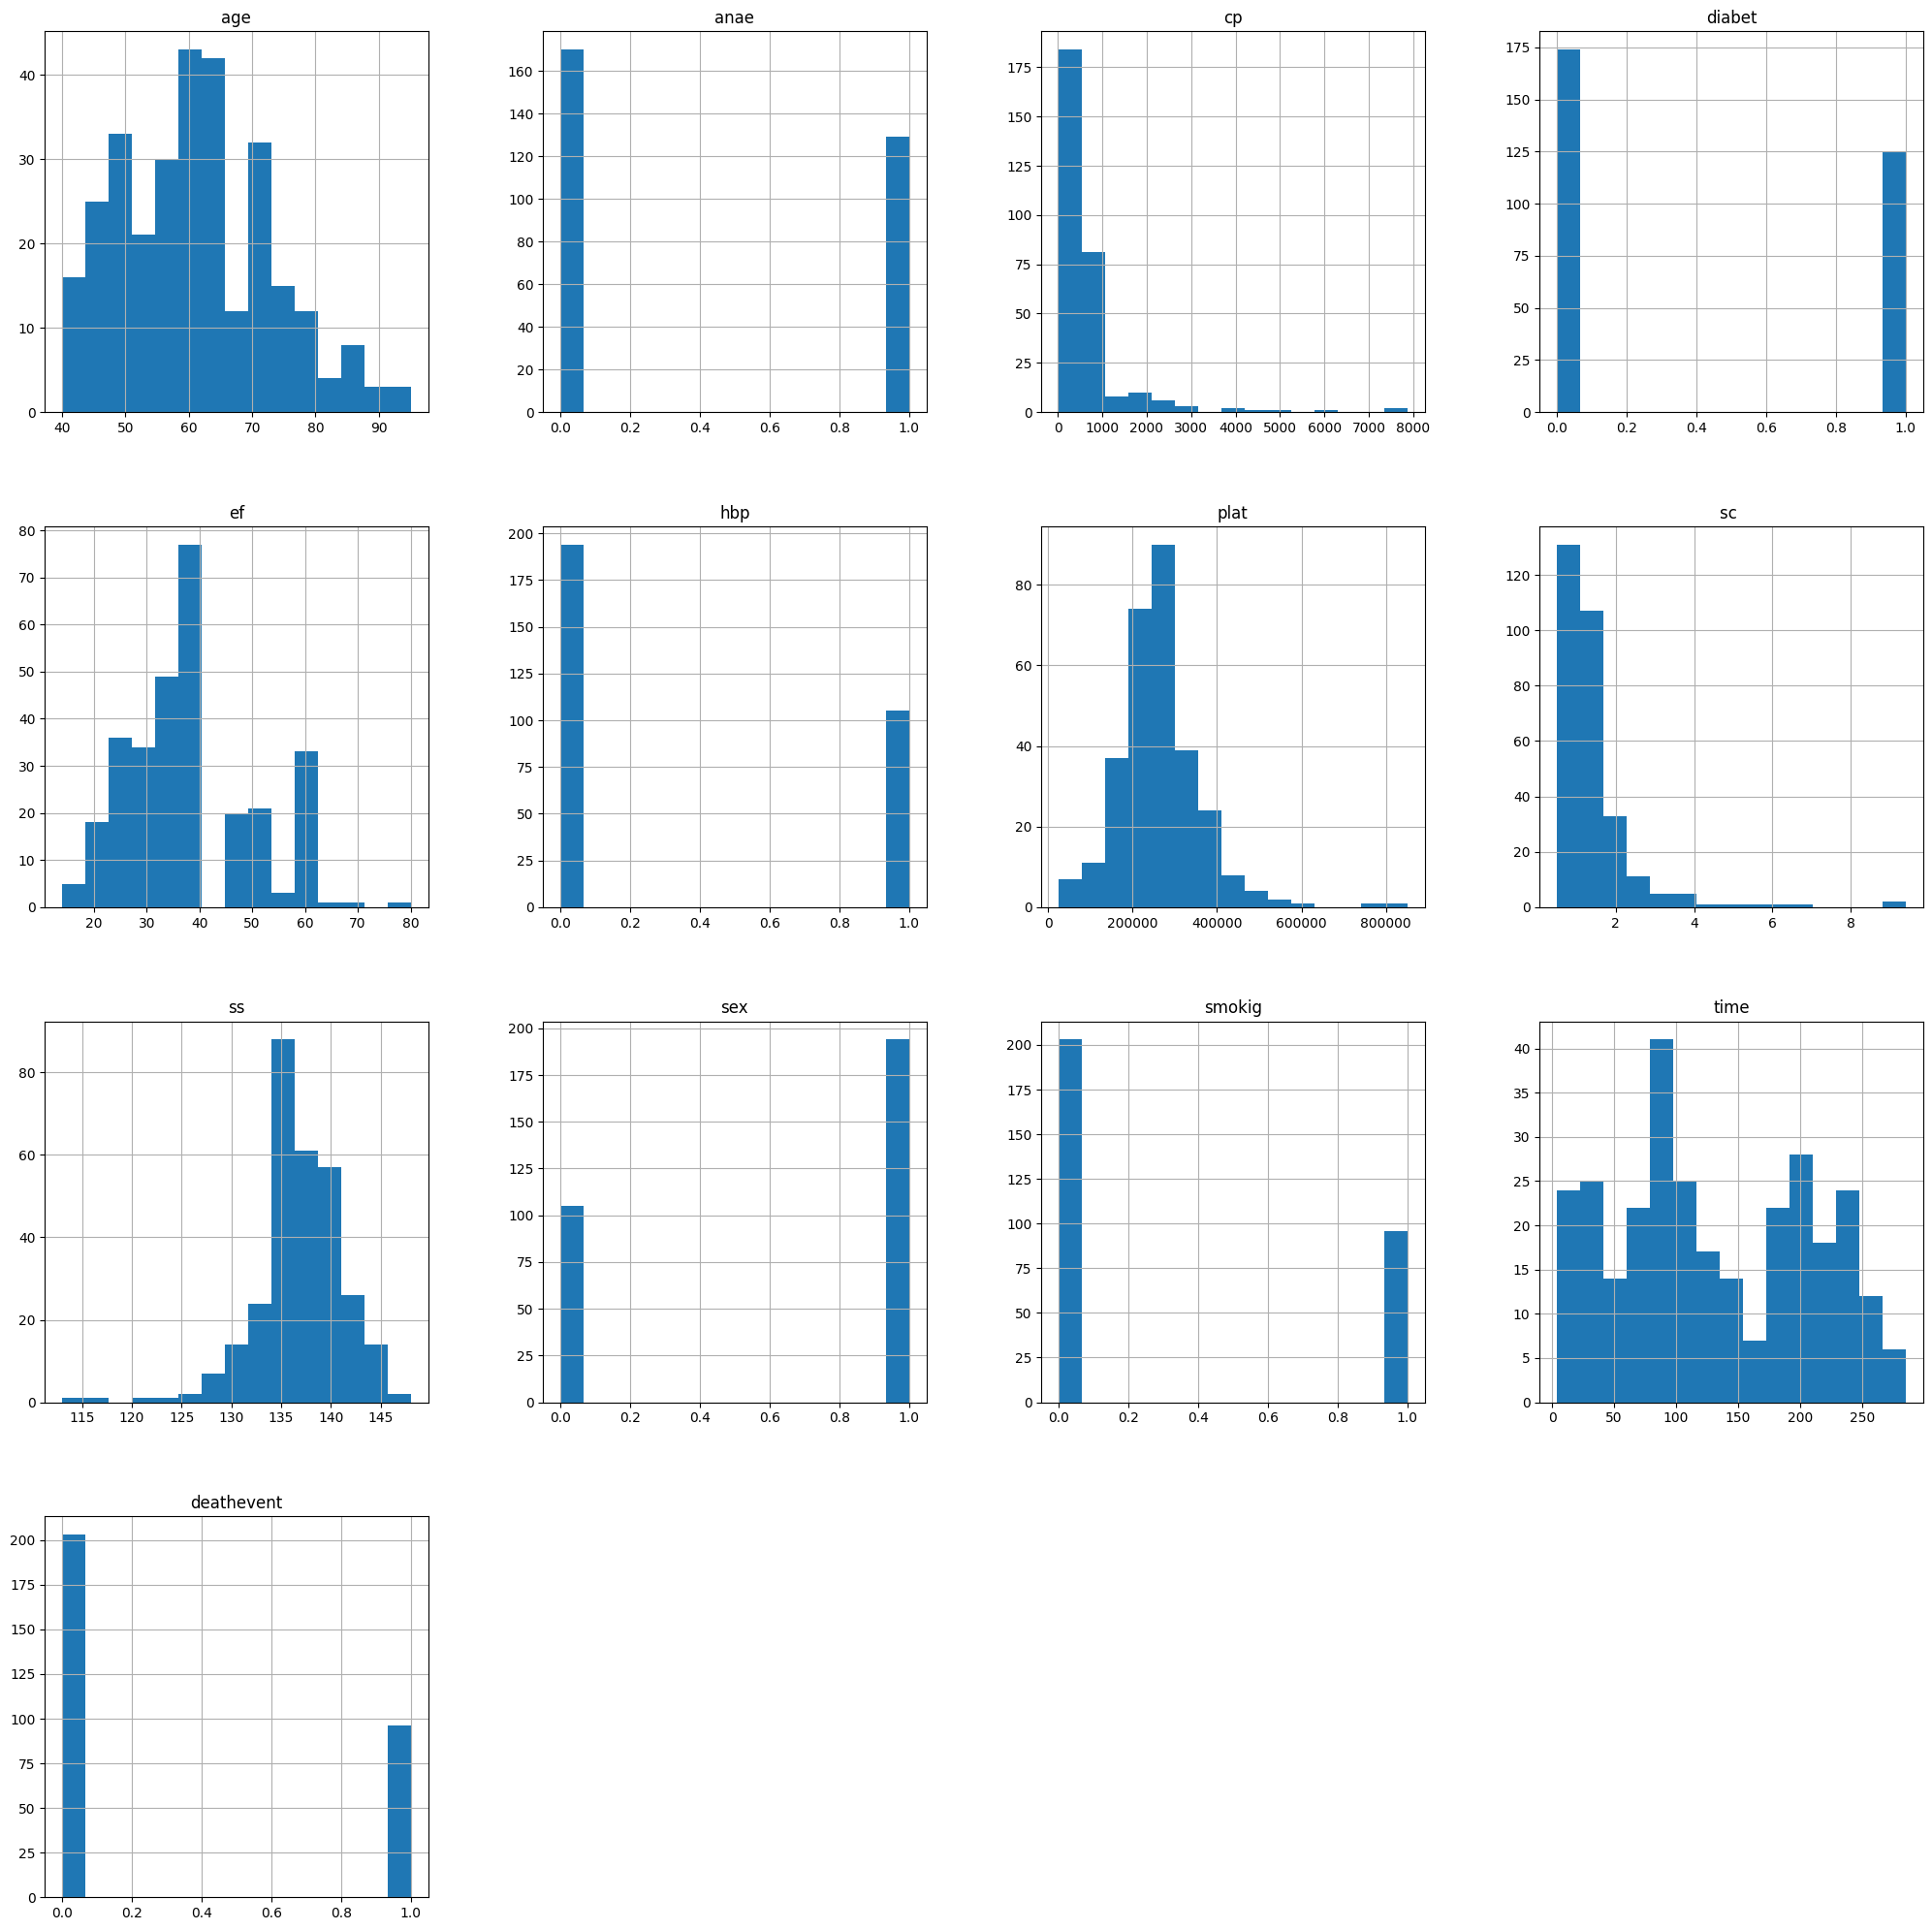

In [7]:
df.hist(figsize=(25, 25), bins=15, legend=False);

In [8]:
heart_df = df.astype({'age': 'int64'})

In [9]:
num_features = ['age', 'anae', 'cp', 'diabet', 'ef','hbp', 'plat', 'sc ', 'ss', 'sex', 'smokig', 'time']
cat_features = [c for c in heart_df.columns if not(c in num_features)]

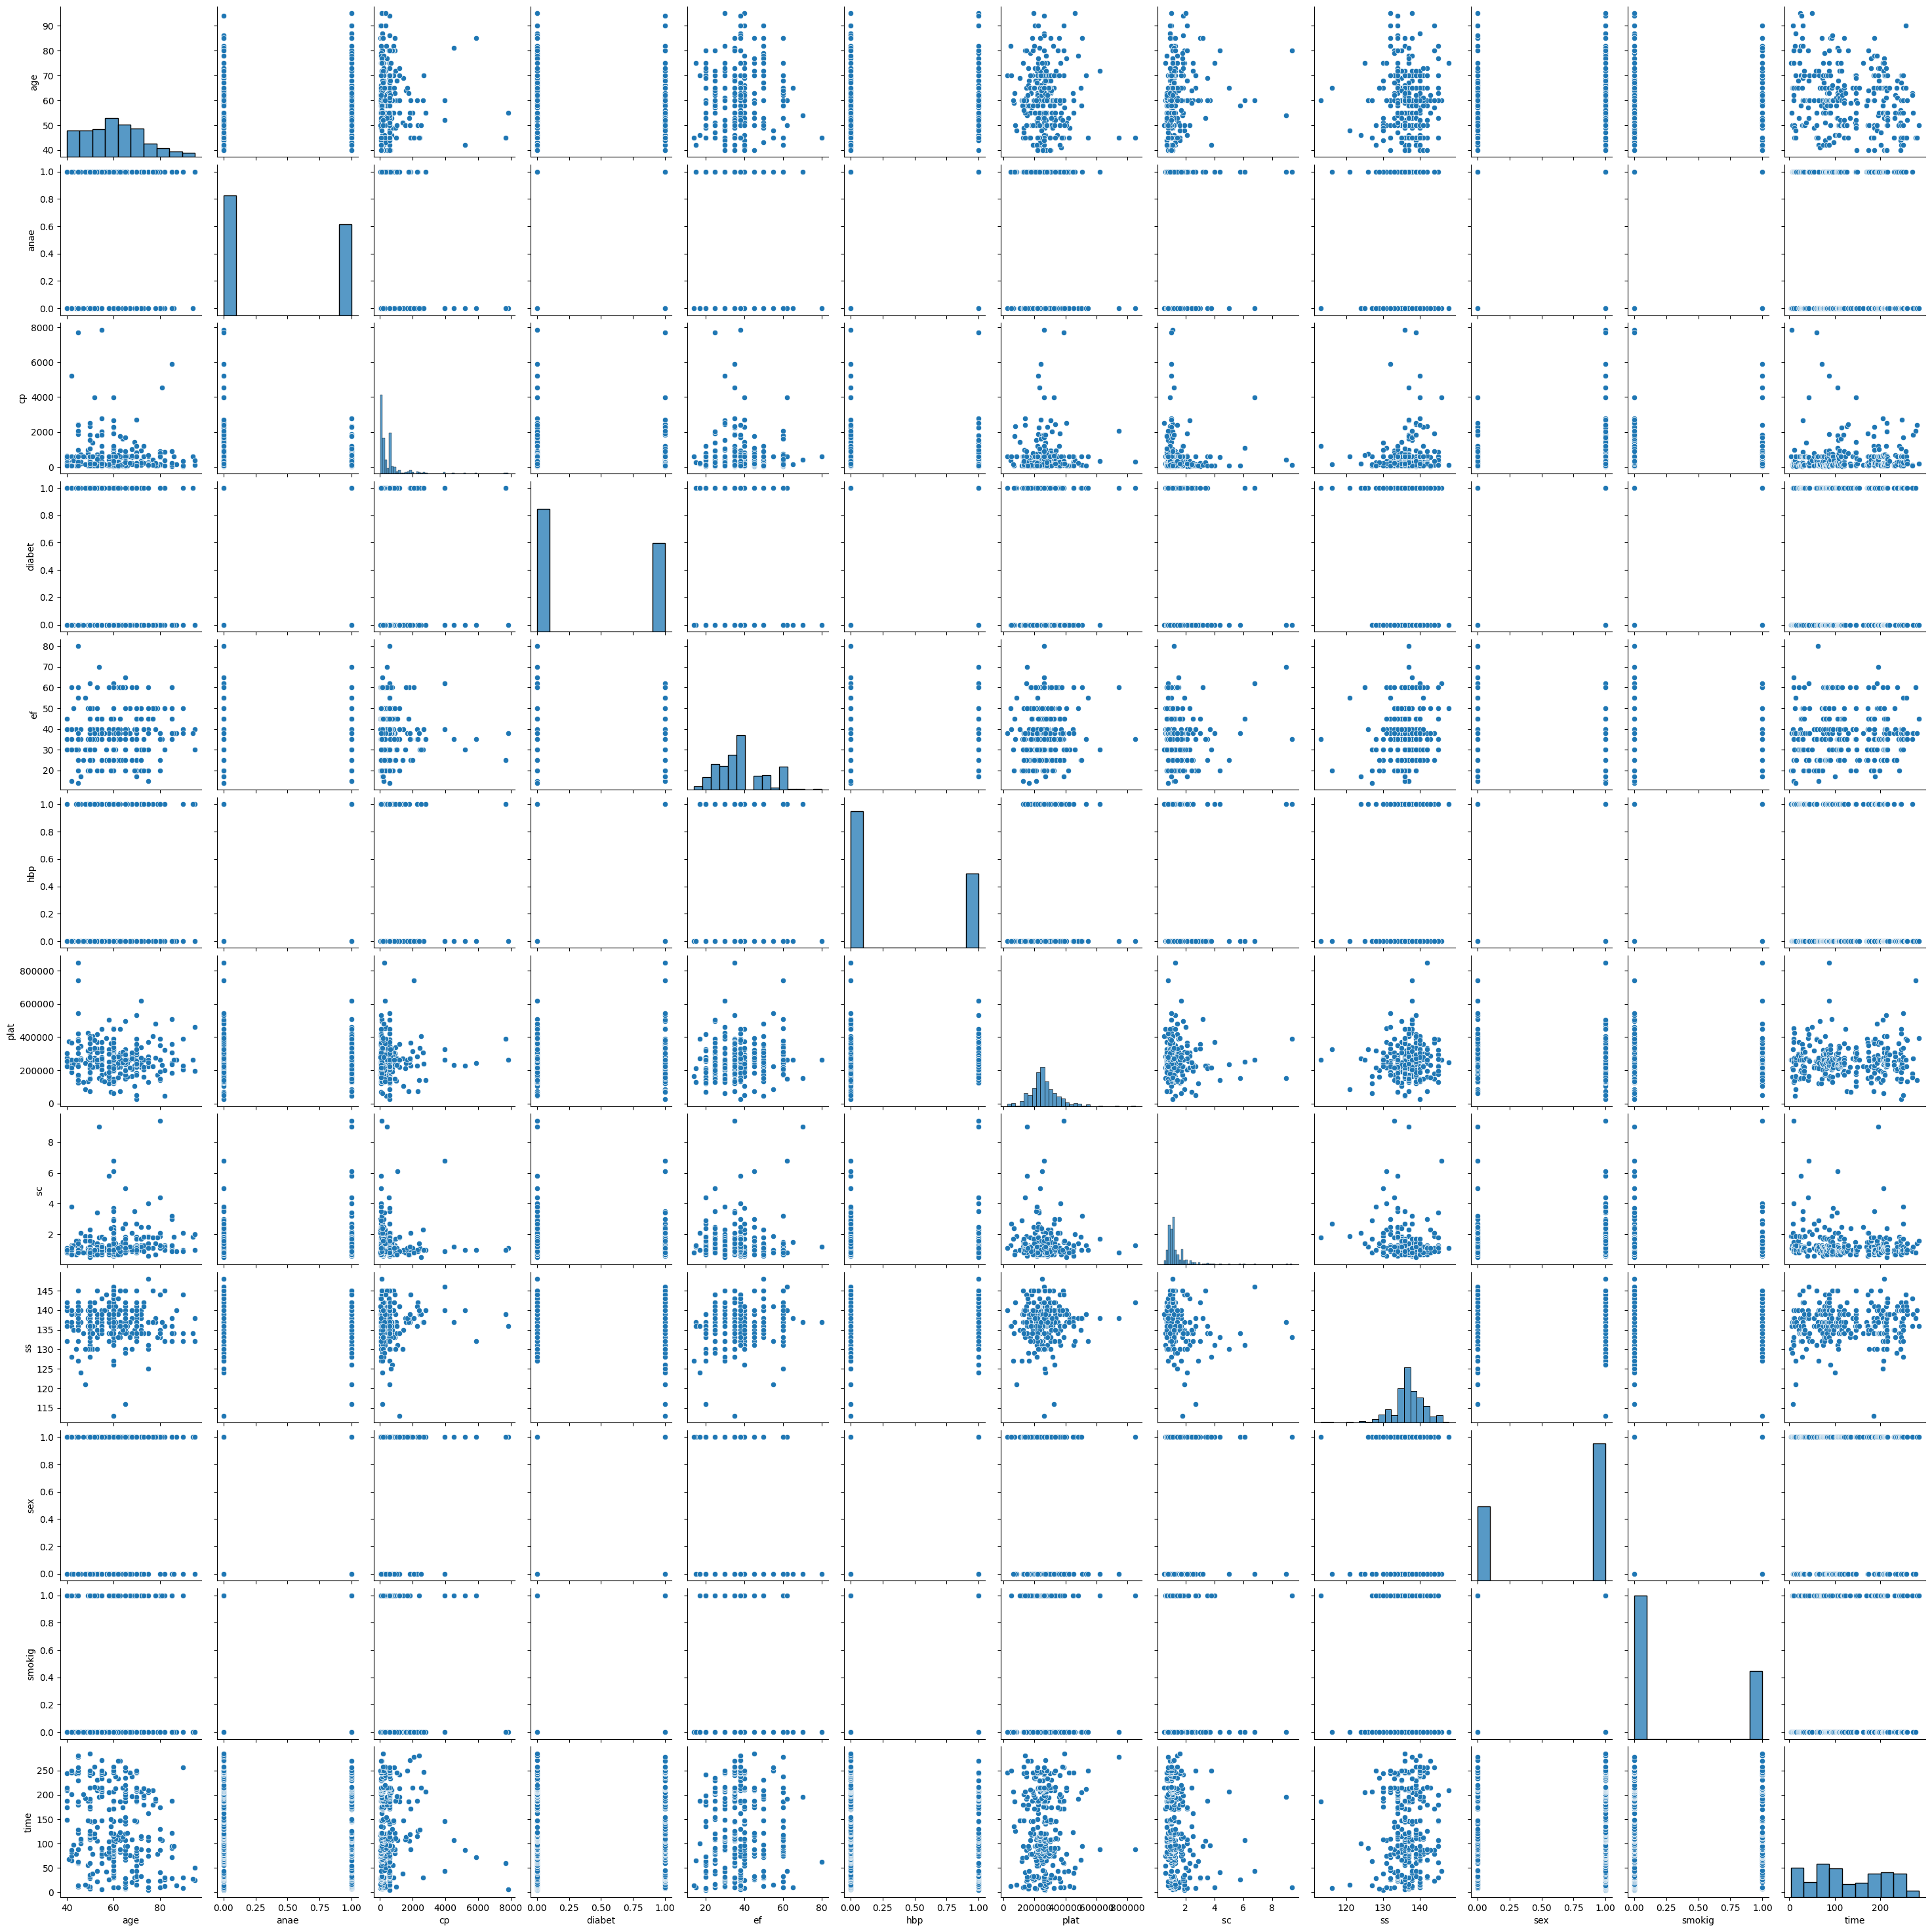

From the received data on the table, we can conclude that we have the largest amount of data in the continuous type ( float64). However, there are also two categorical types object.
To work with object we will use `pd.get_dummies()` to convert to indexer values.continuous values will be first converted to categorical via `pd.qcut()` method that assigns labels to values according to the bins, and then to indicator values via `pd.get_dummies()`

# Binarize data

In [11]:
y_name = 'deathevent'
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(299, 673)


,age: 40.0,age: 41.0,age: 42.0,age: 43.0,age: 44.0,age: 45.0,age: 46.0,age: 47.0,age: 48.0,age: 49.0,...,time: 247,time: 250,time: 256,time: 257,time: 258,time: 270,time: 271,time: 278,time: 280,time: 285
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.model_selection import train_test_split

X, _, y, _= train_test_split(X, y, train_size=100, stratify=y, shuffle=True, random_state=17)

In [13]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'age: 48.0',
 'anae: 1',
 'cp: 131',
 'diabet: 1',
 'ef: 30',
 'hbp: 1',
 'plat: 244000.0',
 'sc : 1.6',
 'sex: 0',
 'smokig: 0',
 'ss: 130',
 'time: 193'}

In [14]:
y_bin = y.values.tolist()

Let's say that initially we know the labels for only 10% of the rows

In [15]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(10, 90)

Set up labels for the test target $y$

In [16]:
y_test = y_bin[n_train:]

# Predictions with original algorithm

In [17]:
%%time
gen = lpipe.predict_array(X_bin, y_bin, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|█████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2996.72it/s]

CPU times: total: 31.2 ms
Wall time: 33 ms


In [18]:
%%time
gen = list(lpipe.predict_array(X_bin, y_bin, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 45024.73it/s]

CPU times: total: 0 ns
Wall time: 3.96 ms


Now let's evaluate the predictions

To complete the task, we take two metrics. 
- The first one will be the accuracy score since our dataset is balanced and the metric is simple. 
- The second take F1 to minimize the false negative forecast

In [19]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

c:\users\user\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\users\user\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\users\user\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\users\user\miniconda3\lib\site-packages\skl

## Let's analyze the results

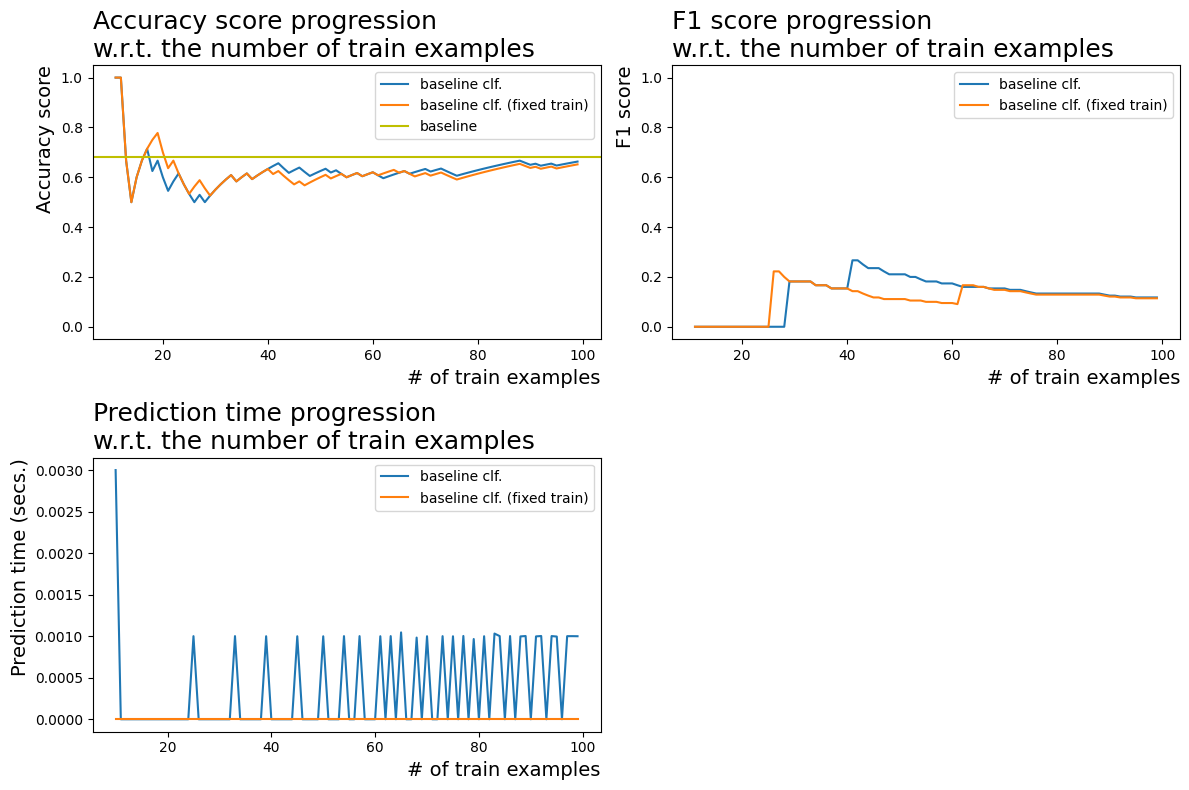

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')

# add baseline for accuracy_score which is the percentage of the biggest class
axs[0,0].axhline(y=(len(y)-sum(y))/len(y), color='y', linestyle='-', label='baseline')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison_orig.png')
plt.show()

In [21]:
print(f"Resulting accuracy score: {score_vals['accuracy_score'][-1]}\tResulting F1 score: {score_vals['f1_score'][-1]}")

Resulting accuracy score: 0.6629213483146067	Resulting F1 score: 0.1176470588235294


# Compare with other models.

In [22]:
y_test = y[n_train:]

C:\Users\User\AppData\Local\Temp\ipykernel_16880\3591660649.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n_train:]


In [23]:
import time
from tqdm import tqdm

def predict_with_generators(x, X_train, Y_train, min_cardinality = 3):
    X_pos = X_train[Y_train]  # if y
    X_neg = X_train[~Y_train]  # if not y

    intersections_pos = x.reshape(1, -1) & X_pos  # bitwise comparison: x with each row of X_pos
    intersections_pos = intersections_pos[intersections_pos.sum(axis=1) >= min_cardinality]  # if number of matches (len) in an intersection is bigger than min_carinality, then keep it 
    intersections_pos = intersections_pos @ (~X_neg.T)  # if row of intersections_pos is equal to column of X_neg, then the product of the row and inverted column is zero 
    n_counters_pos    = (intersections_pos == 0).sum()  # count all equalities of intersection_pos and X_neg 
    
    intersections_neg = x.reshape(1, -1) & X_neg
    intersections_neg = intersections_neg[intersections_neg.sum(axis=1) >= min_cardinality]
    intersections_neg = intersections_neg @ (~X_pos.T)
    n_counters_neg    = (intersections_neg == 0).sum()

    perc_counters_pos = n_counters_pos / len(X_pos)
    perc_counters_neg = n_counters_neg / len(X_neg)

    prediction = perc_counters_pos < perc_counters_neg
    return prediction


def predict_array(X, Y, n_train, update_train = True, use_tqdm = False, predict_func = predict_with_generators):
    for i, x in tqdm(
        X[n_train:].iterrows(),
        initial=n_train, total=len(X),
        desc='Predicting step by step',
        disable=not use_tqdm,
    ):
        n_trains = n_train + i if update_train else n_train
        yield predict_func(x.values, X[:n_trains].values, Y[:n_trains].values, min_cardinality=8)


def apply_stopwatch(iterator):
    outputs = []
    times = []

    t_start = time.time()
    for out in iterator:
        dt = time.time() - t_start
        outputs.append(out)
        times.append(dt)
        t_start = time.time()

    return outputs, times


In [24]:
%%time
gen = predict_array(X, y, n_train, use_tqdm=True)
y_preds, t_preds = apply_stopwatch(gen)

Predicting step by step:  10%|██████▍                                                         | 10/100 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_16880\1538697335.py:33: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yield predict_func(x.values, X[:n_trains].values, Y[:n_trains].values, min_cardinality=8)
Predicting step by step: 100%|█████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2046.04it/s]

CPU times: total: 46.9 ms
Wall time: 47 ms


In [25]:
%%time
gen = list(predict_array(X, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = apply_stopwatch(gen)

Predicting step by step:  10%|██████▍                                                         | 10/100 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_16880\1538697335.py:33: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yield predict_func(x.values, X[:n_trains].values, Y[:n_trains].values, min_cardinality=8)
Predicting step by step: 100%|█████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3000.12it/s]

CPU times: total: 31.2 ms
Wall time: 33 ms


In [26]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:7: FutureWarning: The

C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:7: FutureWarning: The

C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:11: FutureWarning: 

C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
C:\Users\User\AppData\Local\Temp\ipykernel_16880\2727088715.py:11: FutureWarning: 

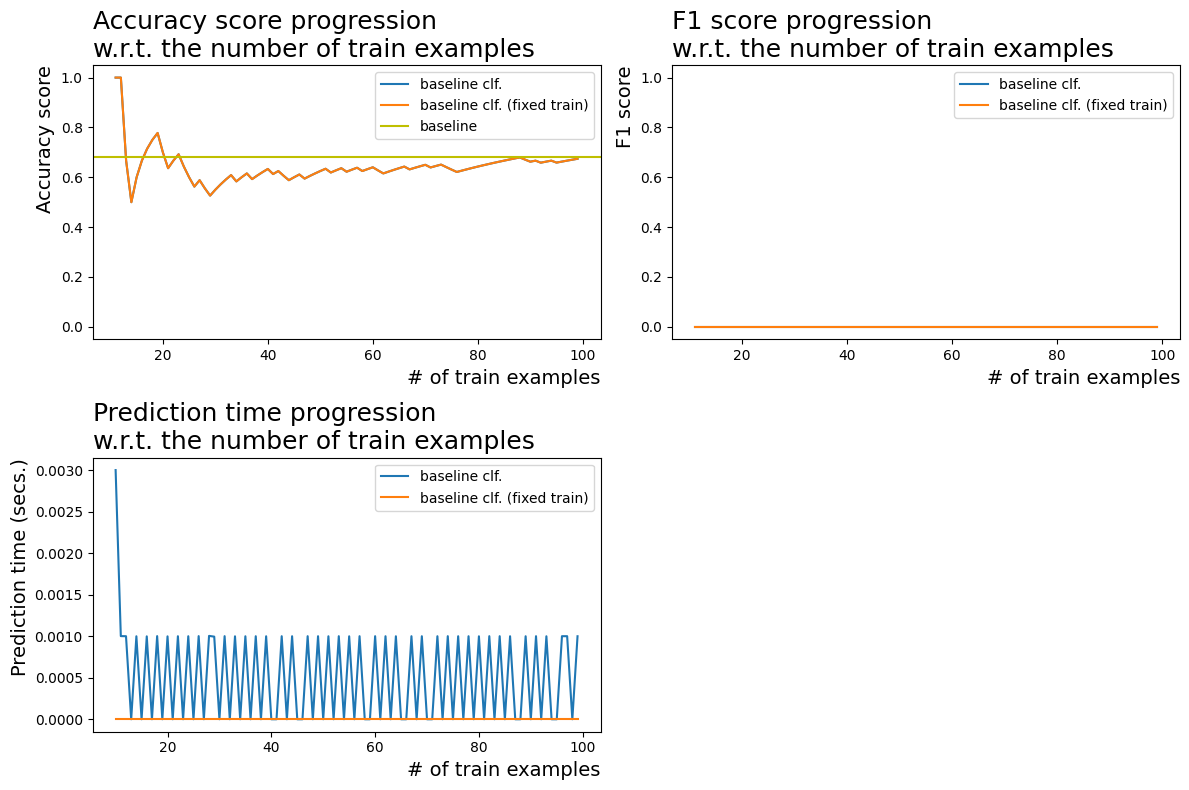

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')

# add baseline for accuracy_score which is the percentage of the biggest class
axs[0,0].axhline(y=(len(y)-sum(y))/len(y), color='y', linestyle='-', label='baseline')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison_mod.png')
plt.show()

In [28]:
print(f"Resulting accuracy score: {score_vals['accuracy_score'][-1]}\tResulting F1 score: {score_vals['f1_score'][-1]}")

Resulting accuracy score: 0.6741573033707865	Resulting F1 score: 0.0


# Conclusion

- As a result, we managed to improve the code, because the accuracy value increased from 0.6629 to 0.6741.
- The original code has a good analytic probability. If it is slightly modified, then it will be possible to use it fully.
- CPU times: total: 31.2 ms & Wall time: 33 ms for original method. CPU times: total: 62.5 ms & Wall time: 36 ms for the second method.
- The work done will have a good impact on the further understanding of the FСA and help develop in this direction. There may be minor bugs in the work, so to further improve the code, you will need to return after a while.
